# ETL

## Extract

In [1]:
import pandas as pd
import numpy as np

script to extract data from csv, json and parquet files

In [2]:
"""
Note:
Our data has a total of 79 features





"""

'\nNote:\nOur data has a total of 79 features\n\n\n\n\n\n'

In [3]:
#import os
#import json
#import pyarrow as pa
#from pathlib import Path
# this script lets you loop through the data folder to read each csv and pass in information into a dataframe named data

#folder = "data/"
#dataframes = []
#for file in os.listdir(folder):
#    path = os.path.join(folder,file)
#    
#    if file.endswith('.csv'):
#        df = pd.read_csv(path)
#    elif file.endswith('parquet'):
#        df = pd.read_parquet(path)
#    else:
#        df = pd.read_json(path, lines=True)
#    
#    print(f"loaded {file} of shape : {df.shape}")
#    dataframes.append(df)
#    
#stores all dataframes into one dataframe no repeat index,
#data = pd.concat(dataframes, ignore_index=True) 


saving data into completeData.csv to prevent repeat extraction

In [4]:
# saving the df as a file so we dont need to repeatedly perform the extraction step
#data.to_csv('completeData.csv', index=False) 
data = pd.read_csv('completeData.csv')

## Extraction

In [5]:
#displaying the shape of our data as well as the first rows
#type(data) pandas.core.frame.DataFram
data.shape , data.head()

((54593, 79),
     Destination Port   Flow Duration   Total Fwd Packets  \
 0              36102              23                   2   
 1                 53           30805                   2   
 2                443         5535509                   8   
 3                 53           49235                   4   
 4                 53             181                   2   
 
     Total Backward Packets  Total Length of Fwd Packets  \
 0                        1                           31   
 1                        2                          108   
 2                        8                          372   
 3                        2                          152   
 4                        2                           70   
 
     Total Length of Bwd Packets   Fwd Packet Length Max  \
 0                             6                      31   
 1                           230                      54   
 2                          3876                     191   
 3              

In [6]:
# display datas type and non empty values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54593 entries, 0 to 54592
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Destination Port             54593 non-null  int64  
 1    Flow Duration                54593 non-null  int64  
 2    Total Fwd Packets            54593 non-null  int64  
 3    Total Backward Packets       54593 non-null  int64  
 4   Total Length of Fwd Packets   54593 non-null  int64  
 5    Total Length of Bwd Packets  54593 non-null  int64  
 6    Fwd Packet Length Max        54593 non-null  int64  
 7    Fwd Packet Length Min        54593 non-null  int64  
 8    Fwd Packet Length Mean       54593 non-null  float64
 9    Fwd Packet Length Std        54593 non-null  float64
 10  Bwd Packet Length Max         54593 non-null  int64  
 11   Bwd Packet Length Min        54593 non-null  int64  
 12   Bwd Packet Length Mean       54593 non-null  float64
 13   

In [6]:
data.keys()

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [7]:
#Displaying total number of features
len(data.keys())

79

In [10]:
# display total number of 'missing' values in our features.
data.isna().sum().sum()

np.int64(150)

In [16]:
# Displaying total sum of columns that contain empty value
data.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [24]:
data_zeros_count = (data == 0).sum()
column_with_most_zeros = data_zeros_count.idxmax()
print(f"The column with the most '0' values is: {column_with_most_zeros}")
print(data[column_with_most_zeros])



The column with the most '0' values is:  Bwd PSH Flags
0        0
1        0
2        0
3        0
4        0
        ..
54588    0
54589    0
54590    0
54591    0
54592    0
Name:  Bwd PSH Flags, Length: 54593, dtype: int64


In [11]:
#View total duplicate column names:
duplicate_column_names = data.columns.duplicated().sum()
print(f"Total duplicate column names: {duplicate_column_names}")


Total duplicate column names: 0


In [12]:
#import seaborn as sns
#import matplotlib as plt
#sns.pairplot(data, kind="scatter")

#using sns pairplot we can visualize data corelation and decide what to 

In [13]:
#we will pass in our stored complete data to a pandas dataframe
#data = pd.DataFrame(data).keys()

# we also want to make clear what our labels are so we will assign attack as the new name
data = data.rename(columns={" Label": "attack"})
print(data.columns[-1])


attack


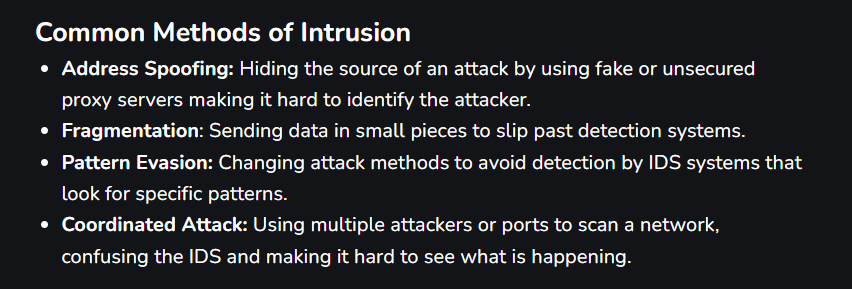

the dataset includes different kinds of attacks

- Benign
- Dos GoldenEye
- Dos Hulk
- Dos Slowhttptest
- Dos slowloris
- Heartbleed

we know Heartbleed is not a denial of service attack and can be removed from our attack data

In [14]:
# viewing the different type of attacks/total number of labels in our data
data['attack'].unique()

array(['BENIGN', 'DoS Hulk', 'DoS GoldenEye'], dtype=object)

In [15]:
#displaying max and min values in label columns

#data['attack'].describe().where((data != 0) & (data != 1))
data.loc[(~data['attack'].isin([0, 1])) & (data['attack'].notna()), 'attack'].agg(['min', 'max'])


min      BENIGN
max    DoS Hulk
Name: attack, dtype: object

In [16]:
# we apply 1 for labels which contain dos as part of the label
data['attack'] = data['attack'].apply(lambda x: 1 if "dos" in str(x).lower() else 0 )
data['attack'].tail()

54588    1
54589    1
54590    1
54591    1
54592    1
Name: attack, dtype: int64

In [17]:
# showing the values in our data which have missing values
data[data.isna().any(axis=1)]

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,attack
5245,80,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
5365,80,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
5744,80,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
5797,80,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
5867,80,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32829,80,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
33339,80,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
33415,80,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
33692,80,0,2,0,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1


In [18]:
data.max()

 Destination Port                  63849.0
 Flow Duration                 119998998.0
 Total Fwd Packets                  5117.0
 Total Backward Packets             8350.0
Total Length of Fwd Packets        88632.0
                                  ...     
Idle Mean                      120000000.0
 Idle Std                       60700000.0
 Idle Max                      120000000.0
 Idle Min                      120000000.0
attack                                 1.0
Length: 79, dtype: float64

In [19]:
# 
column_variances = data.var()

filtered_data = data.loc[:, column_variances != 0]
filtered_data = filtered_data.dropna(axis=1)

for x ,col in enumerate(filtered_data.columns):
    print(x," ",col," : var ",filtered_data[col].var()," : mean " ,filtered_data[col].mean())


0    Destination Port  : var  41825497.60296314  : mean  933.5089663509974
1    Flow Duration  : var  1830461805440085.5  : mean  40233831.92130859
2    Total Fwd Packets  : var  793.9157848016172  : mean  5.796695547048157
3    Total Backward Packets  : var  1979.1633218286488  : mean  4.474254941109666
4   Total Length of Fwd Packets  : var  1062261.7598755558  : mean  367.60938215522134
5    Total Length of Bwd Packets  : var  5866305219.182368  : mean  7592.294524939095
6    Fwd Packet Length Max  : var  92473.73401956048  : mean  265.11708460791675
7    Fwd Packet Length Min  : var  226.39299789179387  : mean  2.1113146374077263
8    Fwd Packet Length Mean  : var  6108.210461470073  : mean  52.63134568792843
9    Fwd Packet Length Std  : var  15088.063840332297  : mean  107.26616948427852
10   Bwd Packet Length Max  : var  10909845.074229602  : mean  3761.430513069441
11    Bwd Packet Length Min  : var  736.5414894958412  : mean  4.855494294140274
12    Bwd Packet Length Mean  : v

In [20]:
# displaying some information about the data which has been removed to check if there is any information we should reconsider
removed_data = data.loc[:, column_variances == 0 ]
removed_data

,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,CWE Flag Count,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
54588,0,0,0,0,0,0,0,0,0,0
54589,0,0,0,0,0,0,0,0,0,0
54590,0,0,0,0,0,0,0,0,0,0
54591,0,0,0,0,0,0,0,0,0,0


In [21]:
# viewing if our data is standardized (mean = 0, std =1 )
filtered_data.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,attack
count,54593.000000,5.459300e+04,54593.000000,54593.000000,54593.000000,5.459300e+04,54593.000000,54593.000000,54593.000000,54593.000000,...,54593.000000,5.459300e+04,5.459300e+04,5.459300e+04,5.459300e+04,5.459300e+04,5.459300e+04,5.459300e+04,5.459300e+04,54593.000000
mean,933.508966,4.023383e+07,5.796696,4.474255,367.609382,7.592295e+03,265.117085,2.111315,52.631346,107.266169,...,29.053688,8.601111e+04,1.374292e+04,1.006066e+05,7.689053e+04,3.735111e+07,4.621719e+05,3.768663e+07,3.701618e+07,0.908322
std,6467.263533,4.278390e+07,28.176511,44.487788,1030.660836,7.659181e+04,304.094942,15.046362,78.155041,122.833480,...,5.213573,5.799821e+05,2.330139e+05,6.778768e+05,5.486710e+05,4.304798e+07,5.060585e+06,4.333113e+07,4.306638e+07,0.288574
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,80.000000,1.454820e+05,2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
50%,80.000000,1.180376e+07,6.000000,5.000000,340.000000,1.159500e+04,329.000000,0.000000,47.500000,125.933018,...,32.000000,6.000000e+00,0.000000e+00,6.000000e+00,6.000000e+00,6.792433e+06,0.000000e+00,6.792784e+06,6.745733e+06,1.000000
75%,80.000000,8.581424e+07,8.000000,6.000000,395.000000,1.159500e+04,374.000000,0.000000,66.400000,156.553505,...,32.000000,1.038000e+03,0.000000e+00,1.038000e+03,1.031000e+03,8.520000e+07,0.000000e+00,8.530000e+07,8.520000e+07,1.000000
max,63849.000000,1.199990e+08,5117.000000,8350.000000,88632.000000,1.450000e+07,11595.000000,1983.000000,2319.000000,5185.441640,...,48.000000,1.370000e+07,6.905038e+06,1.920000e+07,1.370000e+07,1.200000e+08,6.070000e+07,1.200000e+08,1.200000e+08,1.000000


In [22]:
# x will contain the information outside of the labels for each sample
x = filtered_data.loc[:,filtered_data.columns != 'attack']
x

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,36102,23,2,1,31,6,31,0,15.500000,21.920310,...,0,32,0.0,0.0,0,0,0.0,0.0,0,0
1,53,30805,2,2,108,230,54,54,54.000000,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
2,443,5535509,8,8,372,3876,191,0,46.500000,71.876879,...,7,20,346981.0,0.0,346981,346981,5188524.0,0.0,5188524,5188524
3,53,49235,4,2,152,202,38,38,38.000000,0.000000,...,3,32,0.0,0.0,0,0,0.0,0.0,0,0
4,53,181,2,2,70,218,35,35,35.000000,0.000000,...,1,20,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54588,80,11512204,8,5,326,11632,326,0,40.750000,115.258405,...,1,32,892.0,0.0,892,892,6507197.0,0.0,6507197,6507197
54589,80,11513325,5,5,471,3525,471,0,94.200000,210.637604,...,1,32,918.0,0.0,918,918,6508582.0,0.0,6508582,6508582
54590,80,11509201,7,6,314,11632,314,0,44.857143,118.680845,...,1,32,899.0,0.0,899,899,6503248.0,0.0,6503248,6503248
54591,80,11509095,8,5,369,11632,369,0,46.125000,130.461201,...,1,32,914.0,0.0,914,914,6504954.0,0.0,6504954,6504954


In [23]:
# y will hold only the label values which are stored as true false or 0,1 where the label is considered an attack
y = filtered_data['attack'].copy()
y

0        0
1        0
2        0
3        0
4        0
        ..
54588    1
54589    1
54590    1
54591    1
54592    1
Name: attack, Length: 54593, dtype: int64

## XGBOOST Classifier:

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.3,random_state=42,stratify=y)

In [26]:
from sklearn.preprocessing import StandardScaler
#creating a standard scaler to standardize the filtered data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
# displaying if x train is standardized (mean = 0, std = 1)
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
count,3.821500e+04,3.821500e+04,3.821500e+04,3.821500e+04,3.821500e+04,3.821500e+04,3.821500e+04,3.821500e+04,3.821500e+04,3.821500e+04,...,3.821500e+04,3.821500e+04,3.821500e+04,38215.000000,3.821500e+04,38215.000000,3.821500e+04,3.821500e+04,3.821500e+04,3.821500e+04
mean,1.041224e-17,3.421166e-17,-1.115598e-18,-7.437318e-19,1.636210e-17,1.859329e-18,7.511691e-17,2.826181e-17,-9.296647e-18,6.321720e-17,...,-3.718659e-19,-2.115917e-16,-4.090525e-18,0.000000,2.603061e-18,0.000000,-1.740332e-16,-9.296647e-18,-1.264344e-17,5.429242e-17
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,...,1.000013e+00,1.000013e+00,1.000013e+00,1.000013,1.000013e+00,1.000013,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-1.439839e-01,-9.386471e-01,-1.508634e-01,-8.689194e-02,-3.326649e-01,-8.631688e-02,-8.570591e-01,-1.383242e-01,-6.615212e-01,-8.576214e-01,...,-5.212674e-02,-5.578625e+00,-1.478583e-01,-0.057629,-1.479825e-01,-0.140173,-8.655176e-01,-9.258336e-02,-8.675480e-01,-8.571453e-01
25%,-1.315545e-01,-9.352448e-01,-1.195697e-01,-8.689194e-02,-3.326649e-01,-8.631688e-02,-8.570591e-01,-1.383242e-01,-6.615212e-01,-8.576214e-01,...,-5.212674e-02,5.645217e-01,-1.478583e-01,-0.057629,-1.479825e-01,-0.140173,-8.655176e-01,-9.258336e-02,-8.675480e-01,-8.571453e-01
50%,-1.315545e-01,-6.629730e-01,5.605277e-03,8.590002e-03,-2.616215e-02,4.352738e-02,2.058798e-01,-1.383242e-01,-6.418446e-02,1.488015e-01,...,-1.988135e-02,5.645217e-01,-1.478480e-01,-0.057629,-1.479737e-01,-0.140162,-7.078379e-01,-9.258336e-02,-7.109448e-01,-7.006311e-01
75%,-1.315545e-01,1.066774e+00,6.819276e-02,2.768639e-02,2.522213e-02,4.352738e-02,3.544974e-01,-1.383242e-01,1.746457e-01,3.964186e-01,...,1.236404e-02,5.645217e-01,-1.460629e-01,-0.057629,-1.464407e-01,-0.138294,1.114439e+00,-9.258336e-02,1.101044e+00,1.122082e+00
max,9.776129e+00,1.865817e+00,1.599479e+02,1.593680e+02,7.956719e+01,1.622890e+02,3.660427e+01,1.304052e+02,2.842455e+01,4.056101e+01,...,1.620777e+02,3.636095e+00,2.341175e+01,30.733965,2.820690e+01,24.669839,1.923153e+00,1.163873e+01,1.901866e+00,1.930498e+00


In [28]:
# displayed if x test is standardized (mean = 0, std = 1)
pd.DataFrame(X_test).describe()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
count,16378.000000,16378.000000,16378.000000,16378.000000,16378.000000,16378.000000,16378.000000,16378.000000,16378.000000,16378.000000,...,16378.000000,16378.000000,16378.000000,16378.000000,16378.000000,16378.000000,16378.000000,16378.000000,16378.000000,16378.000000
mean,0.003513,0.005490,-0.002523,-0.004833,-0.004243,-0.004320,-0.001714,0.002222,-0.004641,-0.002782,...,-0.005034,-0.003639,0.000177,0.012183,0.001983,-0.003095,0.008273,-0.010869,0.007337,0.009180
std,1.015934,0.999626,0.508169,0.269137,0.737683,0.344635,0.940312,0.968044,0.932566,0.935617,...,0.228496,1.002882,0.991250,1.124950,1.003660,0.978553,1.001272,0.924744,1.000033,1.001462
min,-0.143984,-0.938647,-0.150863,-0.086892,-0.332665,-0.086317,-0.857059,-0.138324,-0.661521,-0.857621,...,-0.052127,-5.578625,-0.147858,-0.057629,-0.147983,-0.140173,-0.865518,-0.092583,-0.867548,-0.857145
25%,-0.131554,-0.935268,-0.119570,-0.086892,-0.332665,-0.086317,-0.857059,-0.138324,-0.661521,-0.857621,...,-0.052127,0.564522,-0.147858,-0.057629,-0.147983,-0.140173,-0.865518,-0.092583,-0.867548,-0.857145
50%,-0.131554,-0.662517,0.005605,0.008590,-0.027064,0.043527,0.205880,-0.138324,-0.067320,0.146142,...,-0.019881,0.564522,-0.147850,-0.057629,-0.147975,-0.140164,-0.707278,-0.092583,-0.710401,-0.699947
75%,-0.131554,1.067663,0.068193,0.027686,0.021616,0.043527,0.351267,-0.138324,0.164194,0.384432,...,-0.019881,0.564522,-0.146096,-0.057629,-0.146469,-0.138324,1.116763,-0.092583,1.103352,1.124405
max,9.720352,1.863153,59.182069,28.805944,41.438250,39.989420,27.212283,95.185464,23.576868,27.146669,...,17.457120,2.868202,18.768613,29.626960,22.447313,19.780274,1.923153,11.638733,1.901866,1.930498


In [29]:
(pd.DataFrame(x).corr().style.background_gradient(cmap='PRGn',vmin=-1,vmax=1))

AttributeError: The '.style' accessor requires jinja2